# Heart Disease Data Set
## Objective: Distinguish presence (values 1,2,3,4) from absence (value 0) of heart disease in the patient

### Import relevant libraries

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks
from sklearn.metrics import roc_curve,auc,roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Read datafile

In [2]:
colnames = ['Age','Sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

data = pd.read_csv('processed.cleveland.data', sep=',', names=colnames)

data

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## Preprocessing the data
We are going to remove rows with missing or '?' values on features

In [3]:
data = data[data != '?']
data = data.dropna().reset_index(drop=True)
data['num'] = np.where(data['num'] != 0, 1, data['num'])
print("Number of rows: ", data.shape[0])
data

Number of rows:  297


,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


### Convert all columns to numeric types
There were 2 columns of type string, so we need to convert the string to numeric

In [4]:
data = data.apply(pd.to_numeric)
data

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


### Visualização dos dados
Criação da pasta caso não exista para guardar gráficos das distribuições das classes e das features que serão criados.


In [5]:
if os.path.isdir('figures') == False:
    os.mkdir("figures")

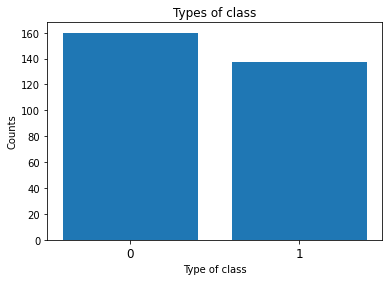

In [6]:
if os.path.isdir('figures') == False:
    os.mkdir("figures")

bars = ["0","1"]
class_counts = data.groupby("num").num.count()
plt.bar(x = class_counts.index, height=class_counts.values)
plt.xlabel("Type of class")
plt.ylabel("Counts")
y_pos = np.arange(len(bars))
bars = ('0','1')
plt.xticks(y_pos, bars, color='black', fontsize='12', horizontalalignment='center')
plt.title("Types of class")
plt.savefig('figures/classes_count.png')

C:\Users\Rosas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rosas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rosas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

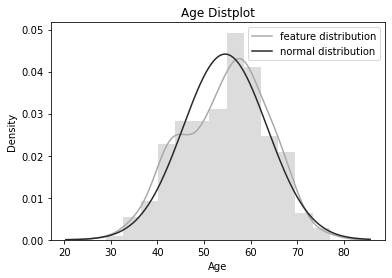

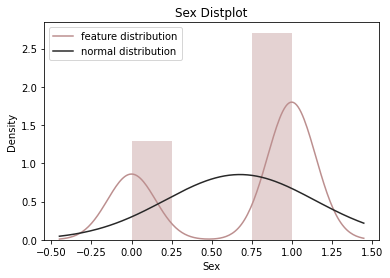

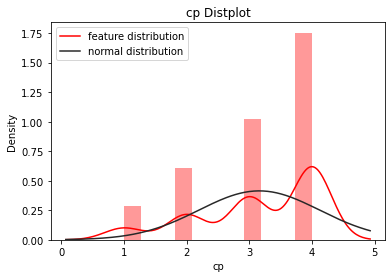

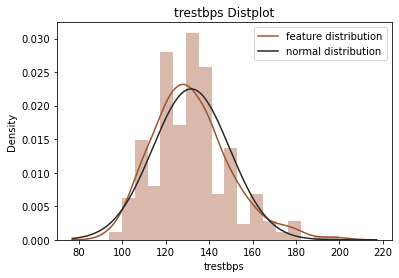

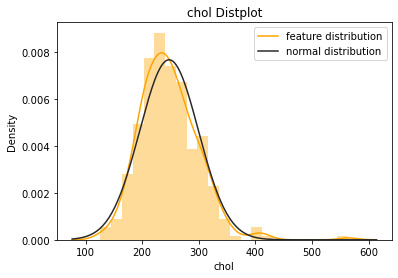

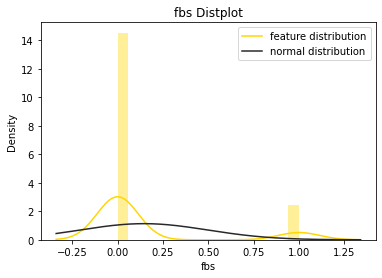

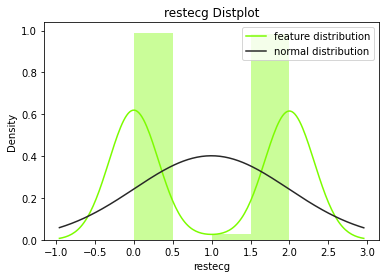

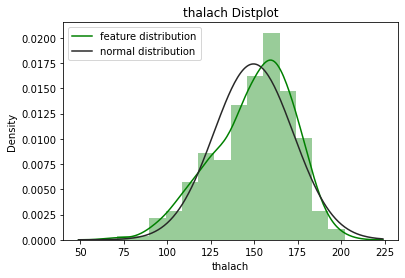

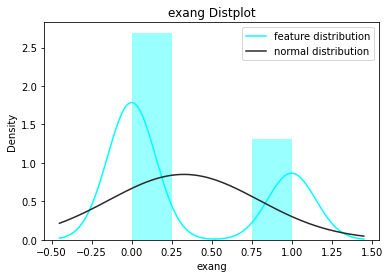

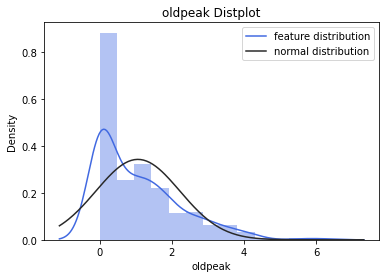

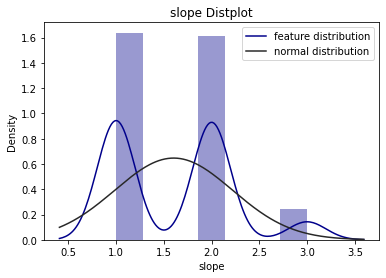

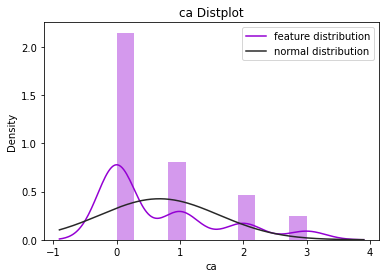

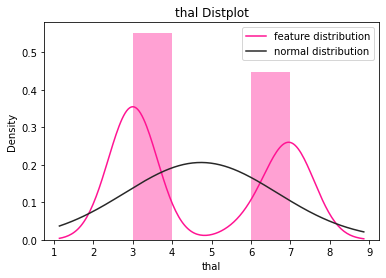

In [7]:
colors = ["darkgray", "rosybrown", "red", "sienna", "orange", "gold", "lawngreen", "green", "cyan", "royalblue", "darkblue", "darkviolet", "deeppink"]

for column, color in zip(data.columns[:-1], colors):
    plt.figure()

    sns.distplot(data[column], fit=stats.norm, color=color)
    plt.title(f"{column} Distplot")

    plt.legend(["feature distribution", "normal distribution"])
    c = column.replace(" ", "_")
    plt.savefig(f"figures/{c}_plots.jpeg", bbox_inches="tight")
    
plt.show()

### Standardization of the data

In [8]:
for col in data.columns:
    if col == "num":
        break
    sc = StandardScaler()
    data[col] = stats.zscore(data[col])
data

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877,0
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220,1
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577,1
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220,0
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.272059,-1.446980,0.873880,0.468418,-0.122330,-0.411450,-1.003419,-1.161395,1.435916,-0.734914,0.643781,-0.721976,1.172577,1
293,-1.056185,0.691095,-2.240629,-1.223355,0.320744,-0.411450,-1.003419,-0.768432,-0.696419,0.124076,0.643781,-0.721976,1.172577,1
294,1.489615,0.691095,0.873880,0.693988,-1.047008,2.430427,-1.003419,-0.375469,-0.696419,2.013854,0.643781,1.411625,1.172577,1
295,0.272059,0.691095,0.873880,-0.095506,-2.241384,-0.411450,-1.003419,-1.510696,1.435916,0.124076,0.643781,0.344824,1.172577,1


In [180]:
models_results = []

## Neural Network
### Splitting the data into 3 samples
We are going to split the features from the class and split our data into 3 samples, one for training, one for validation and other for testing, the training data will have 60%, the validation data will have 20% and the testing data the other 20%.

In [277]:
X = data.iloc[:,:(data.shape[1]-1)].values
y = data.iloc[:,data.shape[1]-1].values
y = pd.DataFrame(y).to_numpy()
n = X.shape[1]
m=len(y)

X_train,X_t,y_train,y_t = train_test_split(X,y2,test_size = 0.4)
X_test,X_validation,y_test,y_validation = train_test_split(X_t,y_t,test_size = 0.5)
print(X_train.shape,X_test.shape,X_validation.shape)

(178, 13) (59, 13) (60, 13)


Now we are modifying y, and transform each value of the y, into an array where it's index represents it's class

In [278]:
ohe = OneHotEncoder()
y2 = ohe.fit_transform(y).toarray()

### Defining the layers of the model
We are going to use keras

In [367]:
model = Sequential()
model.add(Dense(9, input_dim=n, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

### Compiling the model

In [368]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the model
Defininção do callback

In [369]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

We will fit the model with the training data and validate the model using the test data
and use the callback to stop the training loss of the validation test starts to increase

In [370]:
history = model.fit(X_train, y_train,validation_data = (X_validation,y_validation), epochs=1000, batch_size=180, callbacks =[earlystopping])

Epoch 1/1000
1/1 [==============================] - 1s 659ms/step - loss: 0.7360 - accuracy: 0.4831 - val_loss: 0.7512 - val_accuracy: 0.4500
Epoch 2/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7323 - accuracy: 0.4831 - val_loss: 0.7471 - val_accuracy: 0.4500
Epoch 3/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.7288 - accuracy: 0.4831 - val_loss: 0.7431 - val_accuracy: 0.4500
Epoch 4/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.7252 - accuracy: 0.4831 - val_loss: 0.7392 - val_accuracy: 0.4500
Epoch 5/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.7218 - accuracy: 0.4831 - val_loss: 0.7354 - val_accuracy: 0.4500
Epoch 6/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.7185 - accuracy: 0.4831 - val_loss: 0.7318 - val_accuracy: 0.4500
Epoch 7/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.7152 - accuracy: 0.4888 - val_loss: 0.7282 - val_accuracy: 0.4500
Epoch 8/1000

Epoch 59/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.6091 - accuracy: 0.6404 - val_loss: 0.6141 - val_accuracy: 0.6833
Epoch 60/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6075 - accuracy: 0.6517 - val_loss: 0.6126 - val_accuracy: 0.6833
Epoch 61/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.6058 - accuracy: 0.6517 - val_loss: 0.6112 - val_accuracy: 0.6833
Epoch 62/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6042 - accuracy: 0.6517 - val_loss: 0.6098 - val_accuracy: 0.6833
Epoch 63/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.6026 - accuracy: 0.6517 - val_loss: 0.6084 - val_accuracy: 0.7000
Epoch 64/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.6010 - accuracy: 0.6685 - val_loss: 0.6070 - val_accuracy: 0.7000
Epoch 65/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.5994 - accuracy: 0.6742 - val_loss: 0.6057 - val_accuracy: 0.7000
Epoch 

1/1 [==============================] - 0s 29ms/step - loss: 0.5324 - accuracy: 0.7978 - val_loss: 0.5471 - val_accuracy: 0.7500
Epoch 117/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.5313 - accuracy: 0.7978 - val_loss: 0.5463 - val_accuracy: 0.7500
Epoch 118/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5303 - accuracy: 0.8034 - val_loss: 0.5456 - val_accuracy: 0.7500
Epoch 119/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.5292 - accuracy: 0.8034 - val_loss: 0.5448 - val_accuracy: 0.7500
Epoch 120/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.5282 - accuracy: 0.8090 - val_loss: 0.5441 - val_accuracy: 0.7500
Epoch 121/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5272 - accuracy: 0.8146 - val_loss: 0.5434 - val_accuracy: 0.7500
Epoch 122/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5262 - accuracy: 0.8146 - val_loss: 0.5427 - val_accuracy: 0.7500
Epoch 123/1000

1/1 [==============================] - 0s 30ms/step - loss: 0.4784 - accuracy: 0.8596 - val_loss: 0.5092 - val_accuracy: 0.8000
Epoch 174/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.4775 - accuracy: 0.8596 - val_loss: 0.5087 - val_accuracy: 0.8000
Epoch 175/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.4766 - accuracy: 0.8596 - val_loss: 0.5082 - val_accuracy: 0.8000
Epoch 176/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.4757 - accuracy: 0.8596 - val_loss: 0.5077 - val_accuracy: 0.8000
Epoch 177/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.4748 - accuracy: 0.8596 - val_loss: 0.5072 - val_accuracy: 0.8000
Epoch 178/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.4739 - accuracy: 0.8596 - val_loss: 0.5067 - val_accuracy: 0.8000
Epoch 179/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.4730 - accuracy: 0.8596 - val_loss: 0.5062 - val_accuracy: 0.8000
Epoch 180/1000

1/1 [==============================] - 0s 26ms/step - loss: 0.4294 - accuracy: 0.8596 - val_loss: 0.4922 - val_accuracy: 0.8000
Epoch 231/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.4286 - accuracy: 0.8596 - val_loss: 0.4921 - val_accuracy: 0.8000
Epoch 232/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.4277 - accuracy: 0.8652 - val_loss: 0.4919 - val_accuracy: 0.8000
Epoch 233/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.4268 - accuracy: 0.8652 - val_loss: 0.4918 - val_accuracy: 0.8000
Epoch 234/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.4260 - accuracy: 0.8652 - val_loss: 0.4917 - val_accuracy: 0.8000
Epoch 235/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.4251 - accuracy: 0.8652 - val_loss: 0.4915 - val_accuracy: 0.8000
Epoch 236/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.4243 - accuracy: 0.8708 - val_loss: 0.4914 - val_accuracy: 0.8000
Epoch 237/1000

1/1 [==============================] - 0s 26ms/step - loss: 0.3818 - accuracy: 0.8764 - val_loss: 0.4810 - val_accuracy: 0.8000
Epoch 288/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.3810 - accuracy: 0.8764 - val_loss: 0.4808 - val_accuracy: 0.8000
Epoch 289/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.3802 - accuracy: 0.8764 - val_loss: 0.4806 - val_accuracy: 0.8000
Epoch 290/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.3794 - accuracy: 0.8764 - val_loss: 0.4804 - val_accuracy: 0.8000
Epoch 291/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.3786 - accuracy: 0.8764 - val_loss: 0.4802 - val_accuracy: 0.8000
Epoch 292/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3778 - accuracy: 0.8764 - val_loss: 0.4800 - val_accuracy: 0.8000
Epoch 293/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.3770 - accuracy: 0.8764 - val_loss: 0.4798 - val_accuracy: 0.8000
Epoch 294/1000

### Accuracy of the model
We will calculate the accuracy on the training data and on the testing data

In [379]:
score_train = model.evaluate(x = X_train, y = y_train)

print()
print("Train data:")
print ("\tLoss = " + str(score_train[0]))
print ("\tAccuracy = " + str(score_train[1]))

score_v = model.evaluate(x = X_validation, y = y_validation)

print()
print("Validation data:")
print ("\tLoss =  " + str(score_v[0]))
print (" \tAccuracy = " + str(score_v[1]))

score_test = model.evaluate(x = X_test, y = y_test,verbose = 0)

print()
print("Test data:")
print ("\tLoss =  " + str(score_test[0]))
print ("\tAccuracy = " + str(score_test[1]))

6/6 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.8876

Train data:
	Loss = 0.35981228947639465
	Accuracy = 0.8876404762268066
2/2 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.8333

Validation data:
	Loss =  0.47686874866485596
 	Accuracy = 0.8333333134651184

Test data:
	Loss =  0.45476648211479187
	Accuracy = 0.8813559412956238


In [372]:
y_test_1 = np.ones((y_test.shape[0],1))
y_test_1 = y_test[:,1]

pred_prob = model.predict(X_test)
y_pred_nn = np.argmax(pred_prob, axis = 1)
report = classification_report(y_test_1, y_pred_nn, output_dict=True)
nn_report = pd.DataFrame(report).transpose()
nn_report

2/2 [==============================] - 0s 2ms/step


,precision,recall,f1-score,support
0.0,0.868421,0.942857,0.904110,35.000000
1.0,0.904762,0.791667,0.844444,24.000000
accuracy,0.881356,0.881356,0.881356,0.881356
macro avg,0.886591,0.867262,0.874277,59.000000
weighted avg,0.883204,0.881356,0.879839,59.000000


In [373]:
cm = pd.DataFrame(confusion_matrix(y_test_1, y_pred_nn))
cm.to_csv("figures/nn_cm.csv")
cm

,0,1
0,33,2
1,5,19


In [381]:
models_results.append(list(lr_report.iloc[-1, :-1].values) + [score_train[1]])

### Graphs of accuracy and loss
This graph shows the accuracy of the training data and testing data after every epoch

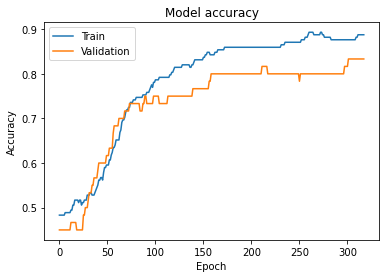

In [382]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('figures/accuracy_plot.png')
plt.show()

This graph shows the loss of the training data and testing data after each epoch

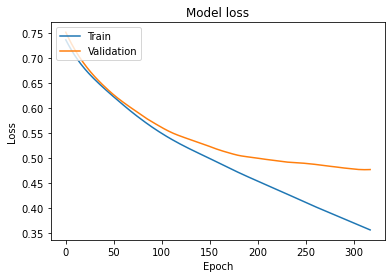

In [383]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Validation'], loc='upper left') 
plt.savefig('figures/loss_plot.png')
plt.show()

### AUC-ROC Curve

In [384]:
fpr, tpr, thresh = roc_curve(y_test_1, pred_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test_1))]

auc_score1 = roc_auc_score(y_test_1, pred_prob[:,1])

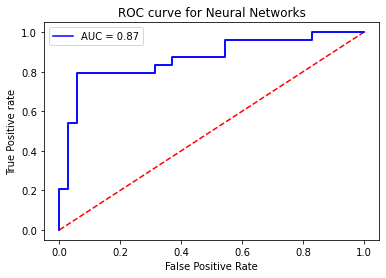

In [385]:
plt.plot(fpr, tpr,color='blue')
plt.plot([0,1],[0,1],'r--')
roc_auc = auc(fpr,tpr)
plt.title('ROC curve for Neural Networks')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='best')
plt.savefig('figures\ROC_plot',dpi=300)
plt.show();

## Separação do dataset
Iremos separar o dataset original em 2, em que 1 será utilizado para o treino e outro para o teste, o de treino terá 70% do dataset original e o de teste os restantes 30%

In [386]:
X = data.iloc[:,:(data.shape[1]-1)].values
y = data.iloc[:,data.shape[1]-1].values
y = pd.DataFrame(y).to_numpy()

y=y.reshape((y.shape[0],)) 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
cv = 5

### Logistic Regression
Definição do modelo

In [387]:
lr = LogisticRegression(random_state = 50)
lr.fit(X_train, y_train)

LogisticRegression(random_state=50)

Cross-Validation para encontrar os melhores hiperparâmetros

In [388]:
gscv = GridSearchCV(estimator=lr, param_grid={"C": [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5]}, cv = cv, scoring = "accuracy", verbose = 3)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .............................C=0.1;, score=0.857 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.857 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.854 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.902 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.829 total time=   0.0s
[CV 1/5] END .............................C=0.3;, score=0.857 total time=   0.0s
[CV 2/5] END .............................C=0.3;, score=0.857 total time=   0.0s
[CV 3/5] END .............................C=0.3;, score=0.854 total time=   0.0s
[CV 4/5] END .............................C=0.3;, score=0.927 total time=   0.0s
[CV 5/5] END .............................C=0.3;, score=0.805 total time=   0.0s
[CV 1/5] END .............................C=0.5;, score=0.833 total time=   0.0s
[CV 2/5] END .............................C=0.5;,

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=50),
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5]},
             scoring='accuracy', verbose=3)

Construção dos modelos com os melhores hiperparâmetros e teste do modelo

In [389]:
lr = LogisticRegression(C = gscv.best_params_["C"],random_state = 50)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

Cálculo da precision, recall, f1-score, accuracy e matriz confusão

In [390]:
report = classification_report(y_test, y_pred_lr, output_dict=True)
lr_report = pd.DataFrame(report).transpose()
lr_report

,precision,recall,f1-score,support
0,0.793103,0.851852,0.821429,54.000000
1,0.750000,0.666667,0.705882,36.000000
accuracy,0.777778,0.777778,0.777778,0.777778
macro avg,0.771552,0.759259,0.763655,90.000000
weighted avg,0.775862,0.777778,0.775210,90.000000


In [391]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_lr))
cm.to_csv("figures/lr_cm.csv")
cm

,0,1
0,46,8
1,12,24


In [392]:
models_results.append(list(lr_report.iloc[-1, :-1].values) + [accuracy_score(y_test, y_pred_lr)])

### Random Forest Classifier
Definição do modelo e escolher os parâmetros a testar no Cross-Validation

In [393]:
rfc = RandomForestClassifier(random_state = 50)
rfc.fit(X_train, y_train)

params = {
    "n_estimators" : np.arange(50, 950, 75),
    "criterion" : ["gini", "entropy"],
    "max_depth" : np.arange(1, n),
}

Cross-Validation para encontrar os melhores hiperparâmetros

In [394]:
gscv = GridSearchCV(estimator=rfc, param_grid = params, cv = cv, scoring = "accuracy", verbose = 3)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.762 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.854 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.951 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.805 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=125;, score=0.786 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=125;, score=0.881 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=125;, score=0.854 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=125;, score=0.951 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=125;, score=0.829 total time=   0.0s
[CV 1/5] END criterio

[CV 5/5] END criterion=gini, max_depth=2, n_estimators=425;, score=0.805 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=500;, score=0.786 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=500;, score=0.857 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=500;, score=0.854 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=500;, score=0.927 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=500;, score=0.805 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=575;, score=0.786 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=575;, score=0.857 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=575;, score=0.854 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=575;, score=0.927 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=575;, score=0.805 total t

[CV 5/5] END criterion=gini, max_depth=3, n_estimators=875;, score=0.780 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=50;, score=0.810 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=50;, score=0.786 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=50;, score=0.854 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=50;, score=0.927 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=50;, score=0.780 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=125;, score=0.810 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=125;, score=0.810 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=125;, score=0.854 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=125;, score=0.927 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=125;, score=0.805 total time= 

[CV 5/5] END criterion=gini, max_depth=5, n_estimators=425;, score=0.756 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=500;, score=0.786 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=500;, score=0.810 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=500;, score=0.829 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=500;, score=0.927 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=500;, score=0.756 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=575;, score=0.786 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=575;, score=0.810 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=575;, score=0.829 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=575;, score=0.902 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=575;, score=0.756 total t

[CV 5/5] END criterion=gini, max_depth=6, n_estimators=875;, score=0.780 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=7, n_estimators=50;, score=0.810 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, n_estimators=50;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, n_estimators=50;, score=0.854 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, n_estimators=50;, score=0.902 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, n_estimators=50;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, n_estimators=125;, score=0.810 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=7, n_estimators=125;, score=0.762 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=7, n_estimators=125;, score=0.854 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=7, n_estimators=125;, score=0.927 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=7, n_estimators=125;, score=0.756 total time= 

[CV 5/5] END criterion=gini, max_depth=8, n_estimators=425;, score=0.756 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=500;, score=0.810 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=8, n_estimators=500;, score=0.762 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=8, n_estimators=500;, score=0.854 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=500;, score=0.927 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=500;, score=0.756 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=575;, score=0.786 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=8, n_estimators=575;, score=0.786 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=8, n_estimators=575;, score=0.854 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=575;, score=0.927 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=575;, score=0.756 total t

[CV 5/5] END criterion=gini, max_depth=9, n_estimators=875;, score=0.756 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=50;, score=0.810 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=50;, score=0.786 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=50;, score=0.854 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=50;, score=0.927 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=50;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=125;, score=0.810 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=125;, score=0.786 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=125;, score=0.854 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=125;, score=0.902 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=125;, score=0.756 to

[CV 4/5] END criterion=gini, max_depth=11, n_estimators=425;, score=0.927 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=11, n_estimators=425;, score=0.756 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=11, n_estimators=500;, score=0.810 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=11, n_estimators=500;, score=0.762 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=11, n_estimators=500;, score=0.854 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=11, n_estimators=500;, score=0.927 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=11, n_estimators=500;, score=0.780 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=11, n_estimators=575;, score=0.786 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=11, n_estimators=575;, score=0.762 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=11, n_estimators=575;, score=0.854 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=11, n_estimators=575;, score=0.

[CV 3/5] END criterion=gini, max_depth=12, n_estimators=875;, score=0.854 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=12, n_estimators=875;, score=0.902 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=12, n_estimators=875;, score=0.756 total time=   1.2s
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=50;, score=0.762 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=50;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=50;, score=0.854 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=1, n_estimators=50;, score=0.951 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=1, n_estimators=50;, score=0.780 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=1, n_estimators=125;, score=0.786 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=1, n_estimators=125;, score=0.857 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=1, n_estimators=125

[CV 5/5] END criterion=entropy, max_depth=2, n_estimators=350;, score=0.805 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=2, n_estimators=425;, score=0.786 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=2, n_estimators=425;, score=0.857 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=2, n_estimators=425;, score=0.854 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=2, n_estimators=425;, score=0.951 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=2, n_estimators=425;, score=0.805 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=2, n_estimators=500;, score=0.786 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=2, n_estimators=500;, score=0.857 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=2, n_estimators=500;, score=0.854 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=2, n_estimators=500;, score=0.951 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=2, n_est

[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=800;, score=0.833 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=800;, score=0.878 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=800;, score=0.951 total time=   1.0s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=800;, score=0.780 total time=   1.1s
[CV 1/5] END criterion=entropy, max_depth=3, n_estimators=875;, score=0.786 total time=   1.0s
[CV 2/5] END criterion=entropy, max_depth=3, n_estimators=875;, score=0.833 total time=   1.0s
[CV 3/5] END criterion=entropy, max_depth=3, n_estimators=875;, score=0.878 total time=   1.1s
[CV 4/5] END criterion=entropy, max_depth=3, n_estimators=875;, score=0.951 total time=   1.0s
[CV 5/5] END criterion=entropy, max_depth=3, n_estimators=875;, score=0.780 total time=   1.0s
[CV 1/5] END criterion=entropy, max_depth=4, n_estimators=50;, score=0.810 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, n_esti

[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=275;, score=0.951 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=275;, score=0.805 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=350;, score=0.786 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=350;, score=0.786 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=350;, score=0.854 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=350;, score=0.951 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=350;, score=0.780 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=425;, score=0.786 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=425;, score=0.810 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=425;, score=0.854 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=5, n_est

[CV 1/5] END criterion=entropy, max_depth=6, n_estimators=725;, score=0.810 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=6, n_estimators=725;, score=0.786 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=6, n_estimators=725;, score=0.854 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=6, n_estimators=725;, score=0.951 total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=6, n_estimators=725;, score=0.780 total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=6, n_estimators=800;, score=0.810 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=6, n_estimators=800;, score=0.786 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=6, n_estimators=800;, score=0.854 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=6, n_estimators=800;, score=0.951 total time=   0.9s
[CV 5/5] END criterion=entropy, max_depth=6, n_estimators=800;, score=0.780 total time=   0.9s
[CV 1/5] END criterion=entropy, max_depth=6, n_est

[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=200;, score=0.854 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=200;, score=0.951 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=200;, score=0.780 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=275;, score=0.810 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=275;, score=0.786 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=8, n_estimators=275;, score=0.854 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=8, n_estimators=275;, score=0.951 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=8, n_estimators=275;, score=0.780 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=8, n_estimators=350;, score=0.810 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=8, n_estimators=350;, score=0.786 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=8, n_est

[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=575;, score=0.756 total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=9, n_estimators=650;, score=0.810 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=9, n_estimators=650;, score=0.786 total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=650;, score=0.829 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=9, n_estimators=650;, score=0.951 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=9, n_estimators=650;, score=0.756 total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=9, n_estimators=725;, score=0.810 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=9, n_estimators=725;, score=0.786 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=9, n_estimators=725;, score=0.854 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=9, n_estimators=725;, score=0.951 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=9, n_est

[CV 1/5] END criterion=entropy, max_depth=11, n_estimators=125;, score=0.810 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=11, n_estimators=125;, score=0.738 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, n_estimators=125;, score=0.854 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, n_estimators=125;, score=0.951 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=11, n_estimators=125;, score=0.780 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=11, n_estimators=200;, score=0.810 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=11, n_estimators=200;, score=0.762 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=11, n_estimators=200;, score=0.829 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=11, n_estimators=200;, score=0.951 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=11, n_estimators=200;, score=0.780 total time=   0.2s
[CV 1/5] END criterion=entropy, max_dept

[CV 2/5] END criterion=entropy, max_depth=12, n_estimators=500;, score=0.762 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=12, n_estimators=500;, score=0.854 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=12, n_estimators=500;, score=0.951 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=12, n_estimators=500;, score=0.756 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=12, n_estimators=575;, score=0.810 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=12, n_estimators=575;, score=0.786 total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=12, n_estimators=575;, score=0.829 total time=   0.6s
[CV 4/5] END criterion=entropy, max_depth=12, n_estimators=575;, score=0.951 total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=12, n_estimators=575;, score=0.756 total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=12, n_estimators=650;, score=0.810 total time=   0.6s
[CV 2/5] END criterion=entropy, max_dept

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=50),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                         'n_estimators': array([ 50, 125, 200, 275, 350, 425, 500, 575, 650, 725, 800, 875])},
             scoring='accuracy', verbose=3)

Construção do modelo com os melhores hiperparâmetros e teste do modelo

In [395]:
rfc = RandomForestClassifier(n_estimators=gscv.best_params_["n_estimators"], criterion=gscv.best_params_["criterion"], max_depth=gscv.best_params_["max_depth"], random_state = 42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

Cálculo da precision, recall, f1-score, accuracy e matriz confusão

In [396]:
report = classification_report(y_test, y_pred_rfc, output_dict=True)
rfc_report = pd.DataFrame(report).transpose()

In [397]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_rfc))
cm.to_csv("figures/rfc_cm.csv")
cm

,0,1
0,49,5
1,12,24


In [398]:
models_results.append(list(rfc_report.iloc[-1, :-1].values) + [accuracy_score(y_test, y_pred_rfc)])

In [399]:
print(models_results)

[[0.7787523372429033, 0.7666666666666667, 0.7648408065250691, 0.8876404762268066], [0.7787523372429033, 0.7666666666666667, 0.7648408065250691, 0.8876404762268066], [0.7758620689655172, 0.7777777777777778, 0.7752100840336135, 0.7777777777777778], [0.8130016958733748, 0.8111111111111111, 0.8066889632107024, 0.8111111111111111]]


### Decision Tree Classifier
Definição do modelo e dos parâmetros a avaliar no Cross-Validation

In [400]:
dtc = DecisionTreeClassifier(random_state = 50)

params = {
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth" : np.arange(1, 13)
}

In [401]:
gscv = GridSearchCV(estimator=dtc, param_grid = params, cv = cv, scoring = "accuracy", verbose = 3)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END criterion=gini, max_depth=1, splitter=best;, score=0.690 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, splitter=best;, score=0.786 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, splitter=best;, score=0.756 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, splitter=best;, score=0.829 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, splitter=best;, score=0.854 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, splitter=random;, score=0.786 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, splitter=random;, score=0.786 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, splitter=random;, score=0.659 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, splitter=random;, score=0.805 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, splitter=random;, score=0.732 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth

[CV 3/5] END criterion=gini, max_depth=10, splitter=best;, score=0.707 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, splitter=best;, score=0.756 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, splitter=best;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, splitter=random;, score=0.738 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, splitter=random;, score=0.667 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, splitter=random;, score=0.756 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, splitter=random;, score=0.780 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, splitter=random;, score=0.732 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, splitter=best;, score=0.690 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, splitter=best;, score=0.714 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, splitter=best;, score=0.707 total time=   0.0s


[CV 1/5] END criterion=entropy, max_depth=9, splitter=random;, score=0.786 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, splitter=random;, score=0.595 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, splitter=random;, score=0.805 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, splitter=random;, score=0.829 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, splitter=random;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, splitter=best;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, splitter=best;, score=0.690 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, splitter=best;, score=0.780 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, splitter=best;, score=0.756 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, splitter=best;, score=0.707 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, splitter=random;, s

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=50),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

Construção do modelo com os melhores hiperparâmetros e teste do modelo

In [402]:
dtc = DecisionTreeClassifier(criterion=gscv.best_params_["criterion"], max_depth=gscv.best_params_["max_depth"], splitter=gscv.best_params_["splitter"], random_state = 50)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [403]:
report = classification_report(y_test, y_pred_dtc, output_dict=True)
dtc_report = pd.DataFrame(report).transpose()

In [404]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_dtc))
cm.to_csv("figures/rfc_cm.csv")
cm

,0,1
0,48,6
1,14,22


In [405]:
models_results.append(list(df_report.iloc[-1, :-1].values) + [accuracy_score(y_test, y_pred_dtc)])

In [418]:
df_results_comparison = pd.DataFrame(models_results, columns = ["precision", "recall", "f1-score","accuracy"], index = ["NN","LR", "RFC", "DTC"])
df_results_comparison = df_results_comparison.round(3)
df_results_comparison = df_results_comparison * 100
df_results_comparison

,precision,recall,f1-score,accuracy
NN,77.9,76.7,76.5,88.8
LR,77.6,77.8,77.5,77.8
RFC,81.3,81.1,80.7,81.1
DTC,77.9,76.7,76.5,77.8


[0.7787523372429033, 0.7666666666666667, 0.7648408065250691, 0.8876404762268066]
[0.7758620689655172, 0.7777777777777778, 0.7752100840336135, 0.7777777777777778]
[0.8130016958733748, 0.8111111111111111, 0.8066889632107024, 0.8111111111111111]
[0.7787523372429033, 0.7666666666666667, 0.7648408065250691, 0.7777777777777778]
